In [1]:
import subprocess
import sys
import mne
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
from typing import Tuple, Iterator
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree
from bids import BIDSLayout
from util.io.iter_BIDSPaths import *
from mne.time_frequency import stft

In [2]:
BIDS_ROOT = '../data/bids'
WSIZE = 200

In [3]:
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
fpaths = layout.get(scope = 'preprocessing',
                    res = 'hi',
                    suffix='epo',
                    extension = 'fif.gz',
                    return_type = 'filename')

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


In [6]:
epochs = mne.read_epochs(fpaths[0])

Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocessing/sub-2/sub-2_task-pitch_run-1_res-hi_desc-clean_epo.fif.gz ...
    Found the data of interest:
        t =    -200.00 ...     250.00 ms
        0 CTF compensation matrices available
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocessing/sub-2/sub-2_task-pitch_run-1_desc-clean_5khz_epo.fif-1.gz ...
    Found the data of interest:
        t =    -200.00 ...     250.00 ms
        0 CTF compensation matrices available
0 bad epochs dropped
0 bad epochs dropped
Not setting metadata
4553 matching events found
No baseline correction applied
0 projection items activated


In [7]:
epochs_100hz = epochs.get_data(item = '100')

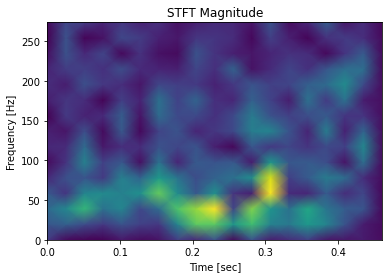

In [8]:
fs = 5000
x = epochs_100hz[1, 0]

f, t, coefs = signal.stft(x, fs)

# Trim to frequencies < 300 Hz
i = int(np.argwhere(f < 300)[-1])
f = f[0:i]
coefs = coefs[0:i,]
coefs = np.abs(coefs)

# Plot
plt.pcolormesh(t, f, coefs, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [53]:
def average_stft_for_one_channel(x, fs): # where x is n_epochs * tsteps
    f, t, Zxx = signal.stft(x, fs) 

    # Crop out freqs > 300
    j = int(np.argwhere(f < 300)[-1])
    f = f[0:j]
    Zxx = Zxx[:,0:j,:] # has shape n_epochs * n_freqs * tsteps
    Zxx = np.abs(Zxx) # take real part only

    # Average over epochs
    Zxx = np.mean(Zxx, axis = 0)
    return (f, t, Zxx)

Zxxs = np.empty([62, 15, 19])
n_chans = np.shape(epochs_100hz)[1]
n_epochs = np.shape(epochs_100hz)[0]
for chan in range(n_chans):
    x = pd.DataFrame(epochs_100hz[:, chan, :])
    f, t, Zxx = average_stft_for_one_channel(x, fs)
    Zxxs[chan, :, :] = Zxx

(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)
(62, 15, 19)


ValueError: Number of coefficients 

In [ ]:
fs = 5000
x = epochs_100hz[1, 0]

f, t, coefs = signal.stft(x, fs)

# Trim to frequencies < 300 Hz
i = int(np.argwhere(f < 300)[-1])
f = f[0:i]
coefs = coefs[0:i,]
coefs = np.abs(coefs)

# Plot
plt.pcolormesh(t, f, coefs, shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [51]:
print(np.shape(epochs_100hz))
Zxxs = np.array([62, 15, 19])
print(np.shape(Zxxs))


(919, 62, 2251)
(3,)


In [56]:
# n_channels = np.shape(epochs_100hz)[1]
# all_chan_coefs = []
# for i in range(n_channels):
#     # Select epochs by channel
#     x = epochs_100hz[:, i, :]
#     out = x.apply(lambda x: signal.stft(x, fs), axis = 1) # FIX THIS
# #     f, t, coefs = signal.stft(x, fs)

#     # Trim to frequencies < 300 Hz
#     j = int(np.argwhere(f < 300)[-1])
#     f = f[0:j]
#     coefs = coefs1[0:j,]
#     coefs = np.abs(coefs)
#     print(np.shape(coefs))

#     # Concatenate
# #     all_chan_coefs = np.concatenate(all_chan_coefs, coefs, axis=2)
#     all_chan_coefs = [all_chan_coefs, out]

#     # epochs_100hz_chan1 = pd.DataFrame(epochs_100hz[:, 0, :])
# # out = epochs_100hz_chan1.apply(lambda x: signal.stft(x, fs), axis = 1)

# # # get freqs
# # f = out[0][0]
# # j = int(np.argwhere(f < 300)[-1])
# # f = f[0:j]

# # # get coefs
# # coef = coefs1[0:j,]
# # coef = np.abs(coefs)

# # # iterate over all channels

# #     # for each channel, get coefs

# #     # don't use apply lol


# n_epochs = np.shape(epochs_100hz)[0]
# n_channels = np.shape(epochs_100hz)[1]


# # all_chan_coefs = np.array([], dtype=np.int64).reshape(15, 19)
# # # for i in range(n_epochs): # Iter over epochs

#     chan_coefs = np.array([])
# #     for j in range(n_channels): # Iter over channels
#             x = epochs_100hz[i, j, :]
#             t, f, coef = signal.stft(x, fs)

#             # Trim to frequencies < 300 Hz
#             j = int(np.argwhere(f < 300)[-1])
#             f = f[0:j]
#             coefs = coefs[0:j,]
#             coefs = np.abs(coefs)
#             print(np.shape(coefs))

#             chan_coefs = np.stack((coefs, coefs))
#             np.shape(chan_coefs)
# #             all_chan_coefs = [all_chan_coefs, coefs]
# #     f, t, coefs = signal.stft(x, fs)

# #     # Trim to frequencies < 300 Hz
# #     j = int(np.argwhere(f < 300)[-1])
# #     f = f[0:j]
# #     coefs = coefs1[0:j,]
# #     coefs = np.abs(coefs)
# #     print(np.shape(coefs))

# #     # Concatenate
# # #     all_chan_coefs = np.concatenate(all_chan_coefs, coefs, axis=2)
# #     all_chan_coefs = [all_chan_coefs, out]